### Segregation indices for subclasses 
For each inhibitory subclass in each section, we treat the point pattern as multitype point process.  
Use NN correlation to calculate segregation effect.

In [3]:
source("/code/F2 - Hypothesis testing/scale.R")
test <- read.csv("/data/sag_data.csv")
options(warn=-1)

Loading required package: spatstat.data

Loading required package: spatstat.univar

spatstat.univar 3.0-0

Loading required package: spatstat.geom

spatstat.geom 3.3-2

Loading required package: spatstat.random

spatstat.random 3.3-1

Loading required package: spatstat.explore

Loading required package: nlme

spatstat.explore 3.3-1

Loading required package: spatstat.model

Loading required package: rpart

spatstat.model 3.3-1

Loading required package: spatstat.linnet

spatstat.linnet 3.2-1


spatstat 3.1-1 
For an introduction to spatstat, type ‘beginner’ 




ERROR: Error in library("dplyr"): there is no package called ‘dplyr’


### Find all subclasses  
For each qualified cluster, find the corresponding subclass and sections.

In [3]:
subs_cluster<-function(types){
    sups<-c()
    for (t in types){
        sup<- unique(test[test$cluster %in% t,]$subclass)
        sups<-append(sups, sup)
    }
    return(sups)
}

In [4]:
data<- read.csv("/root/capsule/code/table-ex/table-ex.csv")
data$subs<-subs_cluster(data$Cluster)
subs.ex<-unique(data$subs)
subs.ex

[1] "001 CLA-EPd-CTX Car3 Glut" "002 IT EP-CLA Glut"       
[3] "003 L5/6 IT TPE-ENT Glut"  "005 L5 IT CTX Glut"       
[5] "006 L4/5 IT CTX Glut"      "007 L2/3 IT CTX Glut"     
[7] "022 L5 ET CTX Glut"        "030 L6 CT CTX Glut"

In [5]:
subs.ex.sec<-list(c(23,21,20),c(20),c(23),c(20),c(24,23,22,21,20),c(24,23,22,21,20),c(23),c(21,20))

In [6]:
data1 <-read.csv('./table-sub.csv')
subs<- data1$Cluster
subs.sec<- list(c(24,20),c(22),c(24,23,21,20),c(21))

In [7]:
pps <-list()
for (t in 1:length(subs)){
    message(subs[t])
    ppw <-create_pp(test, 'FULL',subs.sec[[t]], subs[t])
    pps[[subs[t]]] = ppw
}

046 Vip Gaba

049 Lamp5 Gaba

052 Pvalb Gaba

053 Sst Gaba



In [8]:
ppt <-list()
for (t in 1:length(subs.ex)){
    message(subs.ex[t])
    ppw <-create_pp(test, 'FULL',subs.ex.sec[[t]], subs.ex[t])
    ppt[[subs.ex[t]]] = ppw
}

001 CLA-EPd-CTX Car3 Glut

002 IT EP-CLA Glut

003 L5/6 IT TPE-ENT Glut

005 L5 IT CTX Glut

006 L4/5 IT CTX Glut

007 L2/3 IT CTX Glut

022 L5 ET CTX Glut

030 L6 CT CTX Glut



### Calculate nncorr  
Unnormalized nn correlation: $E(f(M,M^*))$ where $f$ is the indicator function.  
Normalize it using $E(f(M,M'))$ so that the value 1 suggests "lack of correlation": if the marks attached to the points of X are iid.  
The argument X must be a marked point pattern. 

In [22]:
calc_perc<-function(typ,s,df){
    if (length(df$Cluster)==4){
        d<-pps[[typ]][[as.character(s)]]
    }
    else{
        d<-ppt[[typ]][[as.character(s)]]
    }
    seg<-nncorr(d,k=5)
    res<- list()
    res[['Type']] = typ
    # res[['pval']] = df[df$Cluster==typ,2+24-s]  
    res[['unnorm']] = unname(seg[1])
    res[['norm']] = unname(seg[2])
    res[['section']] = s
    return(res)
}

### Table of segregation

In [23]:
df1 =data.frame(matrix(vector(), 0, 4,
                dimnames=list(c(), c('Type','section',"unnorm", "norm"))),
                stringsAsFactors=F)
df1$Type <- as.character(df1$Type)
df1

Type,section,unnorm,norm
<chr>,<lgl>,<lgl>,<lgl>


In [24]:
for (t in 1:length(subs)){
    message(subs[t])
    # temp <-read.csv("df.csv")  ## temp table
    df1$Type <- as.character(df1$Type)
    for (sec in subs.sec[[t]]){
        q<-calc_perc(subs[t],sec,data1)
        df1<-bind_rows(df1,as.data.frame(q))
        #write.csv(temp, "df.csv",row.names = FALSE)
    }    
}

046 Vip Gaba

049 Lamp5 Gaba

052 Pvalb Gaba

053 Sst Gaba



In [26]:
df = data.frame(matrix(vector(), 0, 4,
                dimnames=list(c(), c('Type','section',"unnorm", "norm"))),
                stringsAsFactors=F)
df$Type <- as.character(df$Type)
df

Type,section,unnorm,norm
<chr>,<lgl>,<lgl>,<lgl>


In [27]:
for (t in 1:length(subs.ex)){
    message(subs.ex[t])
    # temp <-read.csv("df.csv")  ## temp table
    df$Type <- as.character(df$Type)
    for (sec in subs.ex.sec[[t]]){
        q<-calc_perc(subs.ex[t],sec,data)
        df<-bind_rows(df,as.data.frame(q))
        #write.csv(temp, "df.csv",row.names = FALSE)
    }    
}

001 CLA-EPd-CTX Car3 Glut

002 IT EP-CLA Glut

003 L5/6 IT TPE-ENT Glut

005 L5 IT CTX Glut

006 L4/5 IT CTX Glut

007 L2/3 IT CTX Glut

022 L5 ET CTX Glut

030 L6 CT CTX Glut



In [29]:
df.comb<-rbind(df,df1)
write.csv(df.comb,"./seg.csv")

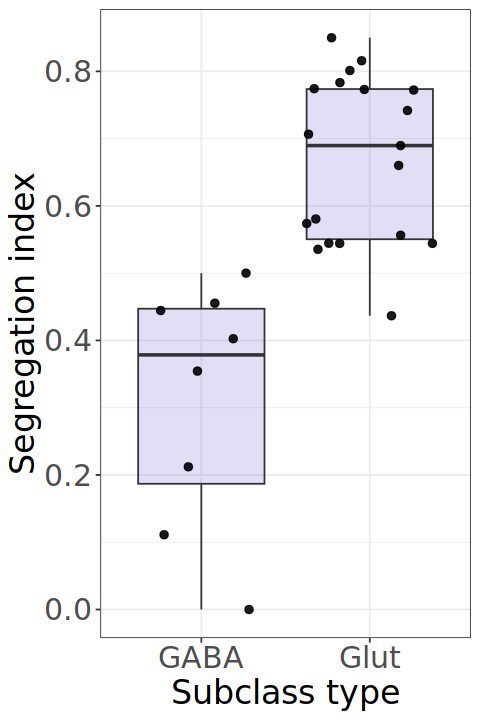

In [36]:
library('ggplot2')
options(repr.plot.width=4, repr.plot.height=6)
ggplot(df.comb, aes(x=as.factor(category), y=unnorm)) +
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    scale_x_discrete(breaks=c(0,1),labels=c("GABA","Glut"))+
    geom_jitter(color="black", size=2, alpha=0.9) + 
    theme_bw()+
    xlab("Subclass type") + ylab('Segregation index')+theme(axis.text=element_text(size=18),
        axis.title=element_text(size=20))